In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Dataset.xlsx')
data.describe()
data.head()

,ISO code,Sex,Age,Height,Weight,Continent,World Bank,Wasting,Overweight,Stunting,Underweight,Status
0,AFG,1,5,75,17,Asia,Low Income,18.2,6.5,53.2,44.9,Stunting
1,AFG,0,4,101,13,Asia,Low Income,8.6,4.6,59.3,32.9,Stunting
2,AFG,0,4,71,17,Asia,Low Income,9.5,5.4,40.9,25.0,Stunting
3,ALB,0,3,81,13,Europe,Upper Middle Income,8.1,9.5,20.4,7.1,Stunting
4,ALB,0,1,79,16,Europe,Upper Middle Income,12.2,30.0,39.2,17.0,Stunting


In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISO code     837 non-null    object 
 1   Sex          837 non-null    int64  
 2   Age          837 non-null    int64  
 3   Height       837 non-null    int64  
 4   Weight       837 non-null    int64  
 5   Continent    837 non-null    object 
 6   World Bank   837 non-null    object 
 7   Wasting      793 non-null    float64
 8   Overweight   684 non-null    float64
 9   Stunting     803 non-null    float64
 10  Underweight  822 non-null    float64
 11  Status       837 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 78.6+ KB
None
              Sex         Age      Height      Weight     Wasting  Overweight  \
count  837.000000  837.000000  837.000000  837.000000  793.000000  684.000000   
mean     0.502987    2.947431   88.559140   14.463560    7.165448    6.569152

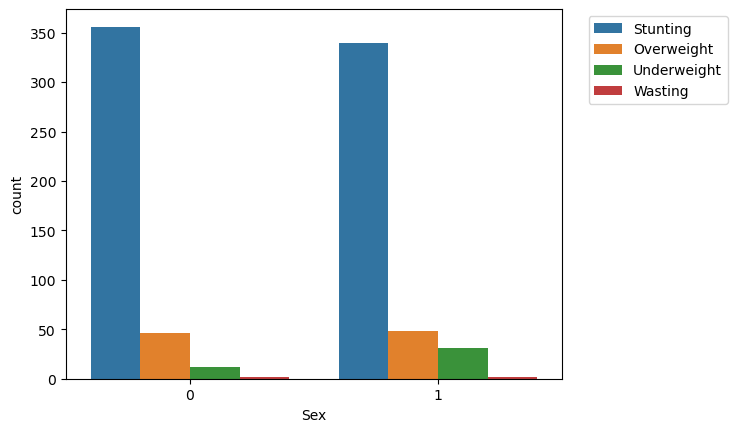

In [4]:
sns.countplot(x = 'Sex', hue = 'Status', data = data)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

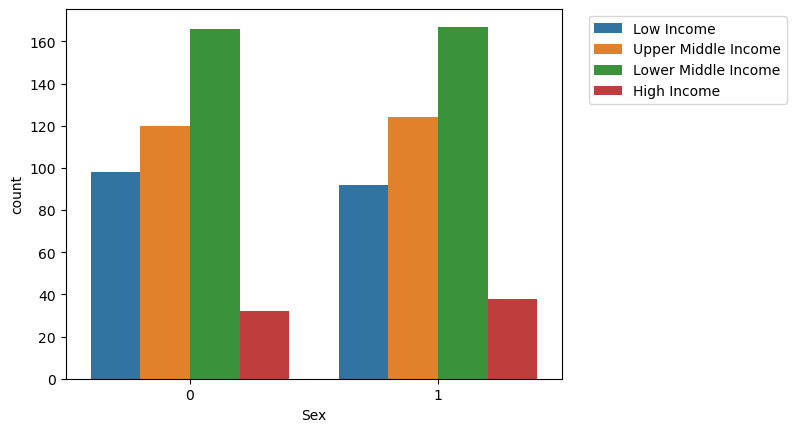

In [5]:
sns.countplot(x = 'Sex', hue = 'World Bank', data = data)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

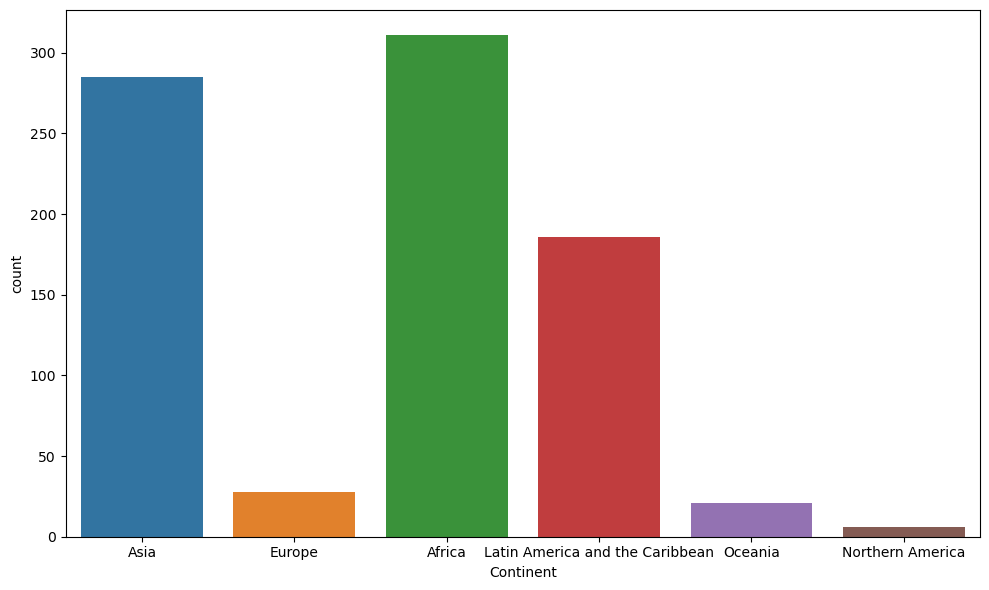

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Continent'])
plt.tight_layout()

In [4]:
data.drop('Wasting', axis=1, inplace = True)
data.drop('Overweight', axis=1, inplace = True)
data.drop('Stunting', axis=1, inplace = True)
data.drop('Underweight', axis=1, inplace = True)

In [10]:
data.head()

,ISO code,Sex,Age,Height,Weight,Continent,World Bank,Status
0,AFG,1,5,75,17,Asia,Low Income,Stunting
1,AFG,0,4,101,13,Asia,Low Income,Stunting
2,AFG,0,4,71,17,Asia,Low Income,Stunting
3,ALB,0,3,81,13,Europe,Upper Middle Income,Stunting
4,ALB,0,1,79,16,Europe,Upper Middle Income,Stunting


In [5]:
# Status = pd.get_dummies(data['Status'], drop_first = True)
Income = pd.get_dummies(data['World Bank'], drop_first = True)
data_train = pd.concat([data, Income], axis = 1)

In [6]:
data_train.head()

,ISO code,Sex,Age,Height,Weight,Continent,World Bank,Status,Low Income,Lower Middle Income,Upper Middle Income
0,AFG,1,5,75,17,Asia,Low Income,Stunting,1,0,0
1,AFG,0,4,101,13,Asia,Low Income,Stunting,1,0,0
2,AFG,0,4,71,17,Asia,Low Income,Stunting,1,0,0
3,ALB,0,3,81,13,Europe,Upper Middle Income,Stunting,0,0,1
4,ALB,0,1,79,16,Europe,Upper Middle Income,Stunting,0,0,1


In [13]:
data_train.shape

(837, 11)

In [7]:
print("*******Initializing Dumping Process********")
dumping = pd.DataFrame({
    'Sex' : data_train['Sex'],
    'Age' : data_train['Age'],
    'Height' : data_train['Height'],
    'Weight' : data_train['Weight'],
#     'Stunting' : data_train['Stunting'],
#     'Underweight' : data_train['Underweight'],
#     'Wasting' : data_train['Wasting'],
    'Low Income' : data_train['Low Income'],
    'Lower Middle Income' : data_train['Lower Middle Income'],
    'Upper Middle Income' : data_train['Upper Middle Income'],
    'Status' : data_train['Status']
})
dumping.to_csv("Preprocessed_Data.csv", index = False)
print("*******Dumping Process Finished!!**********")

*******Initializing Dumping Process********
*******Dumping Process Finished!!**********


In [8]:
print("*******Initializing Dumping Process********")


# Define a function to determine malnourishment status
def get_malnourishment_status(status):
    if status in ['Stunting', 'Overweight']:
        return 'Malnourished'
    else:
        return status

# Create DataFrame with additional 'Malnourishment Status' column
dumping = pd.DataFrame({
    'Sex' : data_train['Sex'],
    'Age' : data_train['Age'],
    'Height' : data_train['Height'],
    'Weight' : data_train['Weight'],
    'Low Income' : data_train['Low Income'],
    'Lower Middle Income' : data_train['Lower Middle Income'],
    'Upper Middle Income' : data_train['Upper Middle Income'],
    'Status' : data_train['Status']
})

# Apply the function to 'Status' column to get 'Malnourishment Status'
dumping['Malnourishment Status'] = dumping['Status'].apply(get_malnourishment_status)

# Dump the DataFrame to CSV
dumping.to_csv("Preprocessed_Data_New.csv", index=False)

print("*******Dumping Process Finished!!**********")


*******Initializing Dumping Process********
*******Dumping Process Finished!!**********


In [11]:
print("*******Initializing Dumping Process********")

# Define a function to determine malnourishment status
def get_malnourishment_status(status):
    if status in ['Stunting', 'Underweight']:
        return 'Malnourished'
    else:
        return status

# Create DataFrame with additional 'Malnourishment Status' column
dumping = pd.DataFrame({
    'Sex' : data_train['Sex'],
    'Age' : data_train['Age'],
    'Height' : data_train['Height'],
    'Weight' : data_train['Weight'],
    'Low Income' : data_train['Low Income'],
    'Lower Middle Income' : data_train['Lower Middle Income'],
    'Upper Middle Income' : data_train['Upper Middle Income'],
    'Status' : data_train['Status']
})

# Apply the function to 'Status' column to get 'Malnourishment Status'
dumping['Malnourishment Status'] = dumping['Status'].apply(get_malnourishment_status)

# Dump the DataFrame to CSV
dumping.to_csv("Preprocessed_Data_New.csv", index=False)

print("*******Dumping Process Finished!!**********")


*******Initializing Dumping Process********
*******Dumping Process Finished!!**********
